In [ ]:
## Storing the models values for future use

# import joblib
# import numpy as np
# import pandas as pd

# # === Load everything ===
# scaler = joblib.load("best_xgb_scaler.pkl")
# model = joblib.load("best_xgb_model.pkl")
# original_feature_names = joblib.load("original_feature_names.pkl")

# # === Reuse your existing scaled data ===
# # You must have these variables already computed and saved (optional: you can reload them using np.load if saved separately)

# # Example:
# # X_train_scaled = np.load("X_train_scaled.npy")
# # y_train = np.load("y_train.npy")

# # === Get predictions for each split ===
# val_preds = model.predict(X_val_scaled)
# val_probs = model.predict_proba(X_val_scaled)[:, 1]

# test_preds = model.predict(X_test_scaled)
# test_probs = model.predict_proba(X_test_scaled)[:, 1]

# train_preds = model.predict(X_train_scaled)
# train_probs = model.predict_proba(X_train_scaled)[:, 1]

# # === Create DataFrames ===

# # 1. Validation
# val_df = pd.DataFrame(X_val_scaled, columns=original_feature_names)
# val_df["TrueLabel"] = y_val
# val_df["PredictedLabel"] = val_preds
# val_df["PredictedProbabilities"] = val_probs
# val_df.to_csv("val_data_for_analysis.csv", index=False)

# # 2. Train
# train_df = pd.DataFrame(X_train_scaled, columns=original_feature_names)
# train_df["TrueLabel"] = y_train
# train_df["PredictedLabel"] = train_preds
# train_df["PredictedProbabilities"] = train_probs
# train_df.to_csv("train_data_for_analysis.csv", index=False)

# # 3. Test
# test_df = pd.DataFrame(X_test_scaled, columns=original_feature_names)
# test_df["TrueLabel"] = y_test
# test_df["PredictedLabel"] = test_preds
# test_df["PredictedProbabilities"] = test_probs
# test_df.to_csv("test_data_for_analysis.csv", index=False)

# # === Optionally save arrays too ===
# np.save("X_val_scaled.npy", X_val_scaled)
# np.save("y_val.npy", y_val)
# np.save("X_train_scaled.npy", X_train_scaled)
# np.save("y_train.npy", y_train)
# np.save("X_test_scaled.npy", X_test_scaled)
# np.save("y_test.npy", y_test)

# print("✅ All model inputs and outputs saved successfully.")


✅ All model inputs and outputs saved successfully.


In [18]:
import joblib
import numpy as np
import pandas as pd
import shap

# Load model and scaler
model = joblib.load("best_xgb_model.pkl")
scaler = joblib.load("best_xgb_scaler.pkl")
original_feature_names = joblib.load("original_feature_names.pkl")

# Load validation set
X_val_scaled = np.load("X_val_scaled.npy")
y_val = np.load("y_val.npy")
X_train_scaled = np.load("X_train_scaled.npy")
# Optional: Load as DataFrame for nicer feature names
X_val_df = pd.DataFrame(X_val_scaled, columns=original_feature_names)


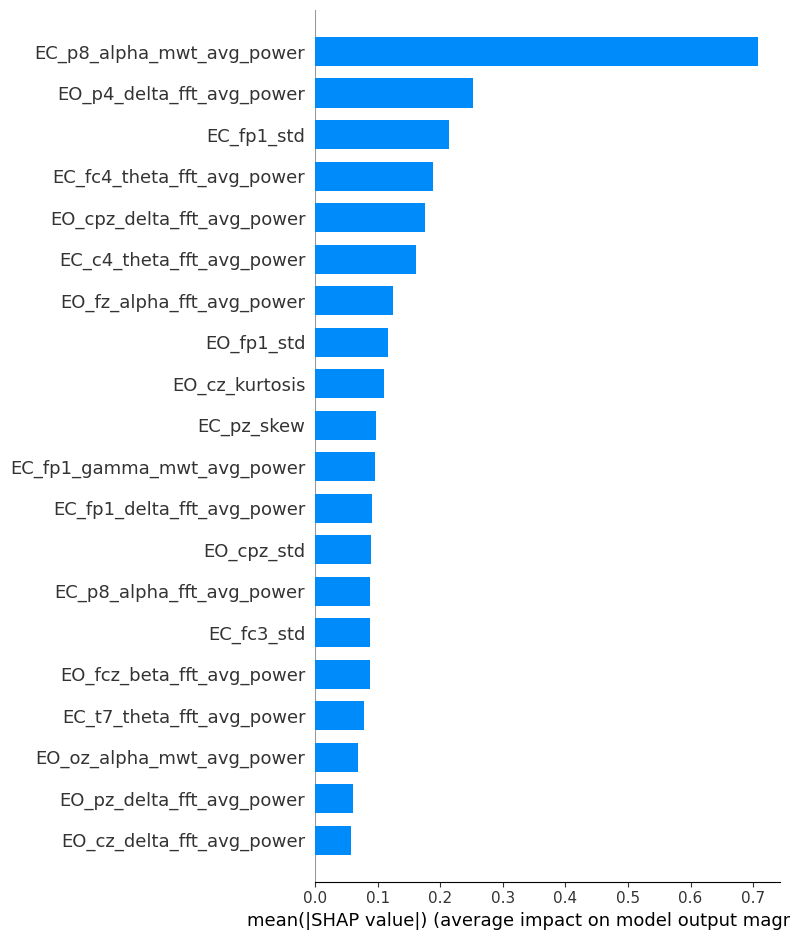

In [19]:
import shap
import matplotlib.pyplot as plt
import joblib

# Load trained model
model = joblib.load("../notebooks/best_xgb_model.pkl")

# SHAP explainer
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_val_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, features=X_val_scaled, feature_names=original_feature_names, plot_type="bar", show=True)
